# Images in Python

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Working with images in python is essentially a visual way of working with 2-d arrays (matrices)

## Matrices

$$
\left[
\begin{array}{ccc}
1 & 3 & 5 \\
2 & 5 & 1 \\
2 & 3 & 8 
\end{array}
\right]
$$

In [2]:
my_matrix = np.array([[1,3,5],[2,5,1],[2,3,8]])

print(my_matrix)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


### All of the normal numpy commands work with matrices (of any dimension)

In [3]:
my_matrix.mean()        # mean of the whole matrix

3.3333333333333335

### You can work over just the rows or columns of the matrix

* axis = 0 (COLUMNS)
* axis = 1 (ROWS)

In [4]:
my_matrix.mean(axis=0)   # mean of the columns

array([ 1.66666667,  3.66666667,  4.66666667])

In [5]:
my_matrix.mean(axis=0)[0]  # mean of the 0th column

1.6666666666666667

In [6]:
np.mean(my_matrix, axis=0)  # alternative

array([ 1.66666667,  3.66666667,  4.66666667])

In [7]:
my_matrix.mean(axis=1)   # mean of the rows

array([ 3.        ,  2.66666667,  4.33333333])

In [8]:
my_matrix.flatten()      # convert to 1D (useful for some plotting)

array([1, 3, 5, 2, 5, 1, 2, 3, 8])

## `imshow` will display 2-d arrays as images

In [9]:
plt.style.use('ggplot')
plt.rc('axes', grid=False)   # turn off the background grid for images

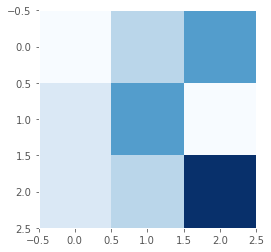

In [10]:
plt.imshow(my_matrix, interpolation='nearest', cmap=plt.cm.Blues);

### Read in some data

In [11]:
test_image = np.load("./MyData/test_data.npy")    # load in a saved numpy array

In [12]:
test_image.ndim, test_image.shape, test_image.dtype

(2, (500, 500), dtype('float64'))

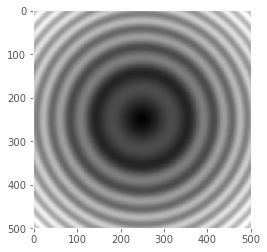

In [13]:
plt.imshow(test_image, cmap=plt.cm.gray);

In [14]:
print("The minimum value of the image is {0:.2f}".format(test_image.min()))
print("The maximum value of the image is {0:.2f}".format(test_image.max()))
print("The mean value of the image is {0:.2f}".format(test_image.mean()))
print("The standard deviation of the image is {0:.2f}".format(test_image.std()))

The minimum value of the image is 0.01
The maximum value of the image is 7.75
The mean value of the image is 3.86
The standard deviation of the image is 1.52


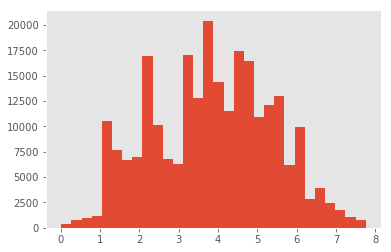

In [15]:
plt.hist(test_image.flatten(),bins=30);    #flatten array to get histogram of whole image

### Math on images applies to every value (pixel)

In [16]:
another_test_image = test_image + 8

print("The minimum value of the other image is {0:.2f}".format(another_test_image.min()))
print("The maximum value of the other image is {0:.2f}".format(another_test_image.max()))
print("The mean value of the other image is {0:.2f}".format(another_test_image.mean()))
print("The standard deviation of the other image is {0:.2f}".format(another_test_image.std()))

The minimum value of the other image is 8.01
The maximum value of the other image is 15.75
The mean value of the other image is 11.86
The standard deviation of the other image is 1.52


### Show the image represenation of `test_image` with a colorbar

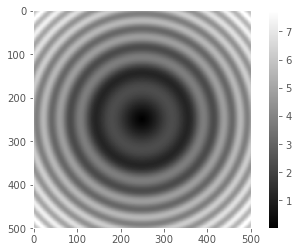

In [17]:
plt.imshow(test_image, cmap=plt.cm.gray)
plt.colorbar();

### Colormap reference: http://matplotlib.org/examples/color/colormaps_reference.html

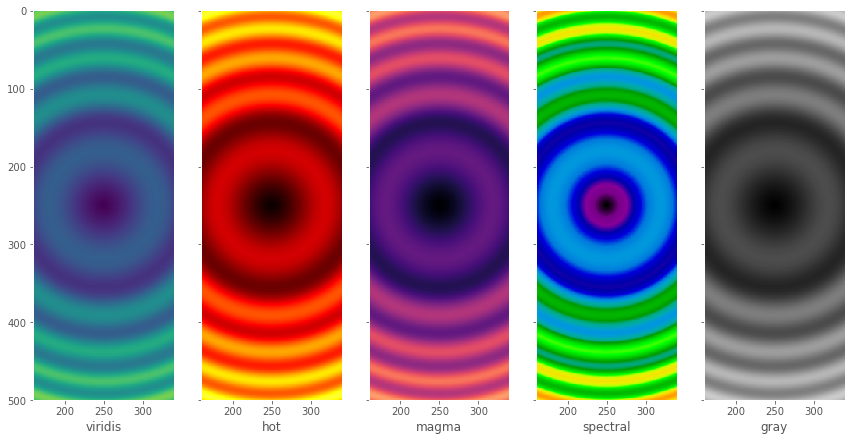

In [18]:
fig, ax = plt.subplots(1,5,sharey=True)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(test_image, cmap=plt.cm.viridis)
ax[0].set_xlabel('viridis')

ax[1].imshow(test_image, cmap=plt.cm.hot)
ax[1].set_xlabel('hot')

ax[2].imshow(test_image, cmap=plt.cm.magma)
ax[2].set_xlabel('magma')

ax[3].imshow(test_image, cmap=plt.cm.spectral)
ax[3].set_xlabel('spectral')

ax[4].imshow(test_image, cmap=plt.cm.gray)
ax[4].set_xlabel('gray');

## WARNING! Common image formats DO NOT preserve dynamic range of original data!!
- Common image formats: jpg, gif, png, tiff
- Common image formats will re-scale your data values to [0:1]
- Common image formats are **NOT** suitable for scientific data!

In [19]:
plt.imsave('Splash.png', test_image, cmap=plt.cm.gray)     # Write the array I to a PNG file

my_png = plt.imread('Splash.png')                          # Read in the PNG file

print("The original data has a min = {0:.2f} and a max = {1:.2f}".format(test_image.min(), test_image.max()))

print("The PNG file has a min = {0:.2f} and a max = {1:.2f}".format(my_png.min(), my_png.max()))

The original data has a min = 0.01 and a max = 7.75
The PNG file has a min = 0.00 and a max = 1.00


## Creating images from math

In [20]:
X = np.linspace(-5, 5, 500)
Y = np.linspace(-5, 5, 500)

X, Y = np.meshgrid(X, Y)     # turns two 1-d arrays (X, Y) into one 2-d grid

Z = np.sqrt(X**2+Y**2)+np.sin(X**2+Y**2)

Z.min(), Z.max(), Z.mean()

(0.01437127898195149, 7.7517598030425772, 3.859731523283386)

### Fancy Image Display

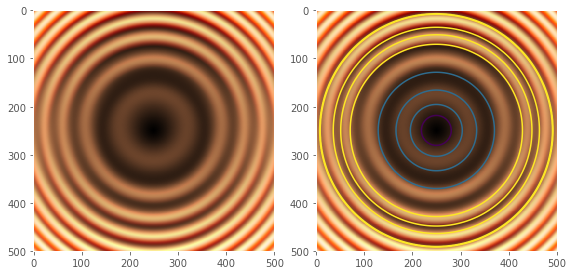

In [21]:
from matplotlib.colors import LightSource

ls = LightSource(azdeg=0,altdeg=40)
shadedfig = ls.shade(Z,plt.cm.copper)

fig, ax = plt.subplots(1,2)

fig.set_size_inches(8,4)

fig.tight_layout()

ax[0].imshow(shadedfig)

contlevels = [1,2,Z.mean()]

ax[1].imshow(shadedfig)
ax[1].contour(Z,contlevels);

### Reading in images (`imread`) - Common Formats

In [22]:
my_doctor = plt.imread('./MyData/doctor5.png')

print("The image my_doctor has a shape [height,width] of {0}".format(my_doctor.shape))
print("The image my_doctor is made up of data of type {0}".format(my_doctor.dtype))
print("The image my_doctor has a maximum value of {0}".format(my_doctor.max()))
print("The image my_doctor has a minimum value of {0}".format(my_doctor.min()))

The image my_doctor has a shape [height,width] of (618, 194)
The image my_doctor is made up of data of type float32
The image my_doctor has a maximum value of 1.0
The image my_doctor has a minimum value of 0.003921568859368563


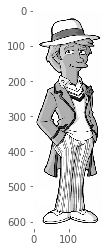

In [23]:
plt.imshow(my_doctor,cmap=plt.cm.gray);

## Images are just arrays that can be sliced. 

- ### For common image formats the origin is the upper left hand corner

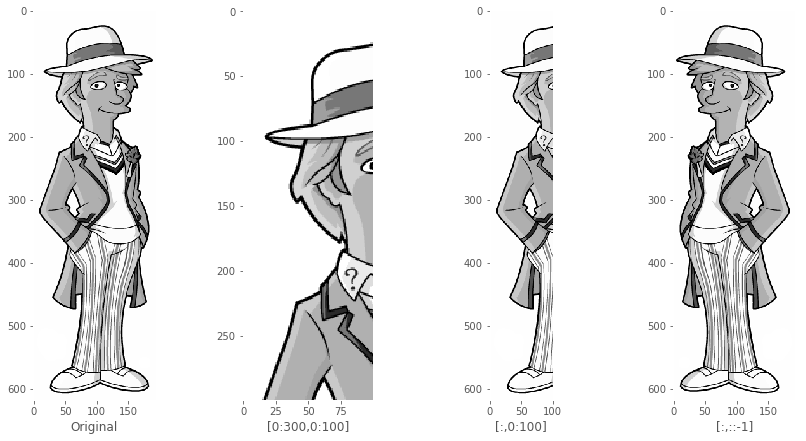

In [24]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(12,6)

fig.tight_layout()

# You can show just slices of the image - Rememeber: The origin is the upper left corner

ax[0].imshow(my_doctor, cmap=plt.cm.gray)
ax[0].set_xlabel('Original')

ax[1].imshow(my_doctor[0:300,0:100], cmap=plt.cm.gray)
ax[1].set_xlabel('[0:300,0:100]')                 # 300 rows, 100 columns

ax[2].imshow(my_doctor[:,0:100], cmap=plt.cm.gray)       # ":" = whole range
ax[2].set_xlabel('[:,0:100]')                     # all rows, 100 columns

ax[3].imshow(my_doctor[:,::-1], cmap=plt.cm.gray);
ax[3].set_xlabel('[:,::-1]') ;                     # reverse the columns

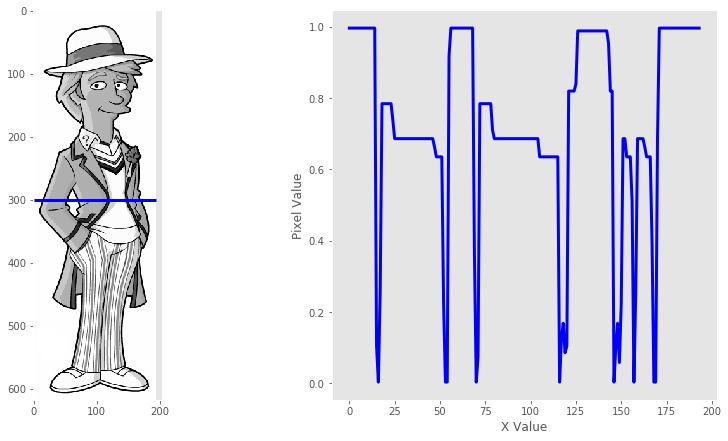

In [25]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)

fig.tight_layout()

CutLine = 300

ax[0].imshow(my_doctor, cmap=plt.cm.gray)
ax[0].hlines(CutLine, 0, 194, color='b', linewidth=3)

ax[1].plot(my_doctor[CutLine,:], color='b', linewidth=3)
ax[1].set_xlabel("X Value")
ax[1].set_ylabel("Pixel Value")

## Simple image manipulation

In [26]:
from scipy import ndimage

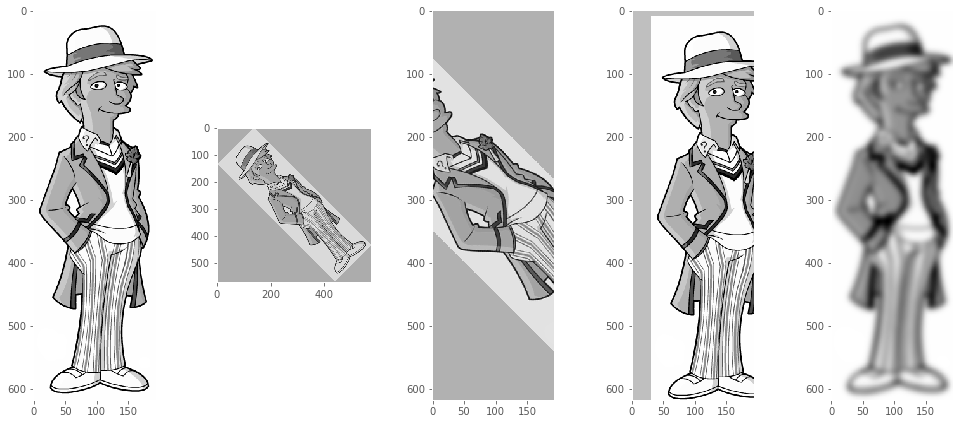

In [27]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(14,6)

fig.tight_layout()

ax[0].imshow(my_doctor, cmap=plt.cm.gray)

my_doctor_2 = ndimage.rotate(my_doctor,45,cval=0.75)               # cval is the value to set pixels outside of image
ax[1].imshow(my_doctor_2, cmap=plt.cm.gray)                 # Rotate and reshape

my_doctor_3 = ndimage.rotate(my_doctor,45,reshape=False,cval=0.75) # Rotate and do not reshape
ax[2].imshow(my_doctor_3, cmap=plt.cm.gray)

my_doctor_4 = ndimage.shift(my_doctor,(10,30),cval=0.75)           # Shift image      
ax[3].imshow(my_doctor_4, cmap=plt.cm.gray)

my_doctor_5 = ndimage.gaussian_filter(my_doctor,5)                # Blur image
ax[4].imshow(my_doctor_5, cmap=plt.cm.gray);

### `ndimage` can do much more: http://scipy-lectures.github.io/advanced/image_processing/

# Pseudocolor - All color astronomy images are fake.

### Color images are composed of three 2-d images: <img src="images/Layers.png" width="150">

### JPG images are 3-d, even grayscale images

In [28]:
redfilter = plt.imread("./MyData/sphereR.jpg")

redfilter.shape,redfilter.dtype

((480, 640, 3), dtype('uint8'))

### We just want to read in one of the three channels

In [29]:
redfilter = plt.imread("./MyData/sphereR.jpg")[:,:,0]

redfilter.shape,redfilter.dtype

((480, 640), dtype('uint8'))

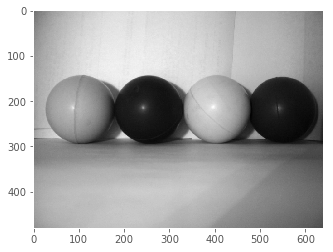

In [30]:
plt.imshow(redfilter,cmap=plt.cm.gray);

In [31]:
greenfilter = plt.imread("./MyData/sphereG.jpg")[:,:,0]
bluefilter = plt.imread("./MyData/sphereB.jpg")[:,:,0]

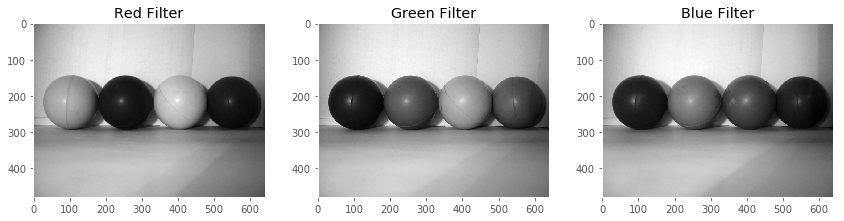

In [32]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,3)

fig.tight_layout()

ax[0].set_title("Red Filter")
ax[1].set_title("Green Filter")
ax[2].set_title("Blue Filter")

ax[0].imshow(redfilter,cmap=plt.cm.gray)
ax[1].imshow(greenfilter,cmap=plt.cm.gray)
ax[2].imshow(bluefilter,cmap=plt.cm.gray);

### Need to create a blank 3-d array to hold all of the images

(480, 640, 3) uint8


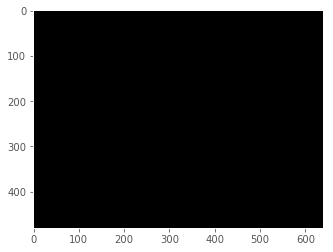

In [33]:
rgb = np.zeros((480,640,3),dtype='uint8')

print(rgb.shape, rgb.dtype)

plt.imshow(rgb,cmap=plt.cm.gray);

## Fill the array with the filtered images

In [35]:
rgb[:,:,0] = redfilter
rgb[:,:,1] = greenfilter
rgb[:,:,2] = bluefilter

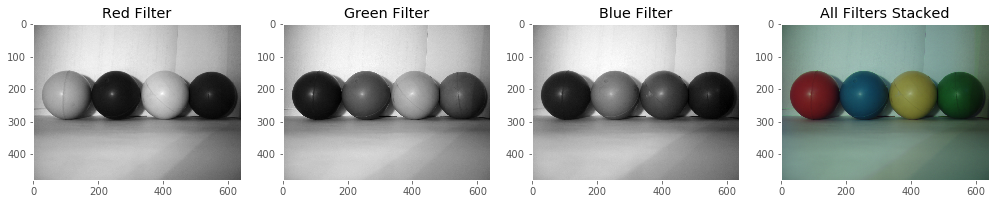

In [36]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(14,3)

fig.tight_layout()

ax[0].set_title("Red Filter")
ax[1].set_title("Green Filter")
ax[2].set_title("Blue Filter")
ax[3].set_title("All Filters Stacked")

ax[0].imshow(redfilter,cmap=plt.cm.gray)
ax[1].imshow(greenfilter,cmap=plt.cm.gray)
ax[2].imshow(bluefilter,cmap=plt.cm.gray)
ax[3].imshow(rgb,cmap=plt.cm.gray);

In [37]:
print("The image rgb has a shape [height,width] of {0}".format(rgb.shape))
print("The image rgb is made up of data of type {0}".format(rgb.dtype))
print("The image rgb has a maximum value of {0}".format(rgb.max()))
print("The image rgb has a minimum value of {0}".format(rgb.min()))

The image rgb has a shape [height,width] of (480, 640, 3)
The image rgb is made up of data of type uint8
The image rgb has a maximum value of 195
The image rgb has a minimum value of 4


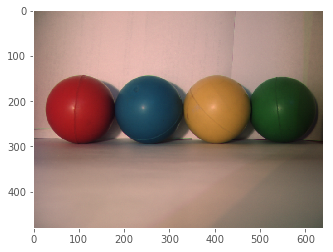

In [38]:
rgb[:,:,0] = redfilter * 1.5

plt.imshow(rgb)